# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I enjoyed my flight. The bo...
1,✅ Trip Verified | Why do you make it so hard? ...
2,✅ Trip Verified | After several delays and ca...
3,Not Verified | Literally the worst flight of ...
4,✅ Trip Verified | I swore I would never fly B...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
print(f"We have successfully collected {df.shape[0]} reviews of British Airways")

We have successfully collected 1000 reviews of British Airways


## Reading CSV file from Local Drive

In [6]:
df =  pd.read_csv('data/BA_reviews.csv', index_col = [0])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 15.6+ KB


In [8]:
df["reviews"][0]

'✅ Trip Verified |  I enjoyed my flight. The boarding was swift and service was very friendly and professional. The food selection was good and I enjoyed the quality. The was only one downside - when we landed there was an issue with ground crew not being ready at T5, so in total from landing to getting the doors open it took 30 minutes. I believe the Heathrow T5 were having strike action that week.'

## Removing unnecessary text before | in the reviews column

In [9]:
df["reviews"] = df["reviews"].str.split('|',expand=True)[1]
df

,reviews
0,I enjoyed my flight. The boarding was swift ...
1,Why do you make it so hard? After a so so lou...
2,"After several delays and canceled flights, w..."
3,Literally the worst flight of my life. After...
4,I swore I would never fly BA again after the...
...,...
995,"Los Angeles to London. I booked with AA, LAX..."
996,The overall flight wasn't too bad. Seats and...
997,\r\nBA’s Galleries lounge at CPT is adequate ...
998,Gatwick to San Jose. I’ve just stepped onto ...


## Importing NLTK

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

In [10]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DIGVIJAY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Function to Preprocess the Text

In [12]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [13]:
df['processedText'] = df['reviews'].apply(preprocess_text)
df

,reviews,processedText
0,I enjoyed my flight. The boarding was swift ...,enjoyed flight . boarding swift service friend...
1,Why do you make it so hard? After a so so lou...,"make hard ? lounge experience , staff taking c..."
2,"After several delays and canceled flights, w...","several delay canceled flight , finally made c..."
3,Literally the worst flight of my life. After...,literally worst flight life . booking ticket t...
4,I swore I would never fly BA again after the...,swore would never fly ba messed much trying ge...
...,...,...
995,"Los Angeles to London. I booked with AA, LAX...","los angeles london . booked aa , lax lhr round..."
996,The overall flight wasn't too bad. Seats and...,overall flight n't bad . seat everything comfy...
997,\r\nBA’s Galleries lounge at CPT is adequate ...,ba ’ gallery lounge cpt adequate let poor food...
998,Gatwick to San Jose. I’ve just stepped onto ...,gatwick san jose . ’ stepped onto ba flight ga...


## Sentiment Analysis using NLTK VADER

VADER( Valence Aware Dictionary for Sentiment Reasoning) is an NLTK module that provides sentiment scores based on the words used. It is a rule-based sentiment analyzer in which the terms are generally labeled as per their semantic orientation as either positive or negative.

In [14]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.5:
        return 'Positive'
    elif scores['compound'] < 0 :
        return 'Negative'
    else:
        return 'Neutral'        

In [15]:
df['sentiments'] = df['processedText'].apply(get_sentiment)

df

,reviews,processedText,sentiments
0,I enjoyed my flight. The boarding was swift ...,enjoyed flight . boarding swift service friend...,Positive
1,Why do you make it so hard? After a so so lou...,"make hard ? lounge experience , staff taking c...",Negative
2,"After several delays and canceled flights, w...","several delay canceled flight , finally made c...",Negative
3,Literally the worst flight of my life. After...,literally worst flight life . booking ticket t...,Negative
4,I swore I would never fly BA again after the...,swore would never fly ba messed much trying ge...,Positive
...,...,...,...
995,"Los Angeles to London. I booked with AA, LAX...","los angeles london . booked aa , lax lhr round...",Negative
996,The overall flight wasn't too bad. Seats and...,overall flight n't bad . seat everything comfy...,Negative
997,\r\nBA’s Galleries lounge at CPT is adequate ...,ba ’ gallery lounge cpt adequate let poor food...,Negative
998,Gatwick to San Jose. I’ve just stepped onto ...,gatwick san jose . ’ stepped onto ba flight ga...,Positive


In [16]:
sentiments_counts = df['sentiments'].value_counts()
sentiments_counts

Positive    512
Negative    382
Neutral     106
Name: sentiments, dtype: int64

## Visual Representation of Sentiments

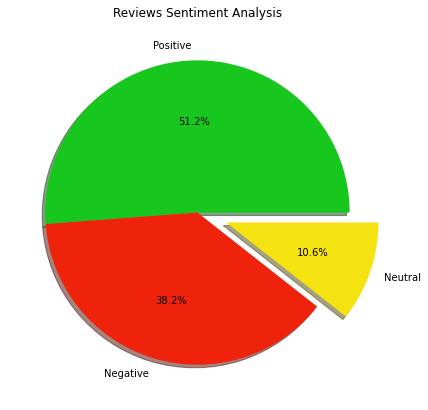

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

colors = ['#18C71D','#EF230B','#F5E311']

plt.title("Reviews Sentiment Analysis")
plt.pie(sentiments_counts.values, labels = sentiments_counts.index, explode = (0, 0, 0.20), autopct='%1.1f%%',
        shadow=True, colors =colors)
plt.show()

## Visual Representation of the words in each Sentiment

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, clr, title):
    wordcloud = WordCloud(background_color=clr, stopwords=stopwords, colormap='Set1', 
                        max_font_size=25, scale=3, random_state=1)

    wordcloud  =wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.title(title)
    plt.imshow(wordcloud)
    plt.show()

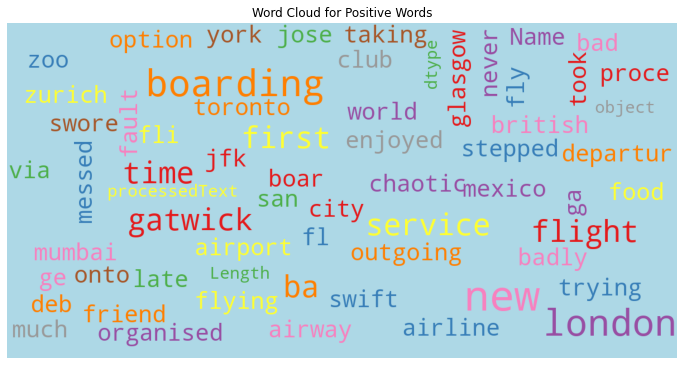

In [19]:
show_wordcloud(df[df['sentiments'] == 'Positive']['processedText'], 'lightblue', 'Word Cloud for Positive Words')

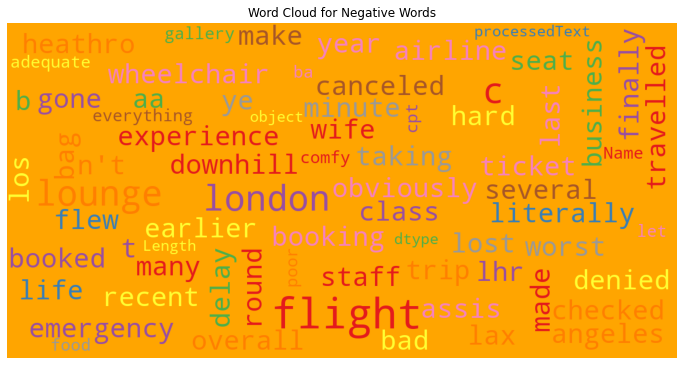

In [20]:
show_wordcloud(df[df['sentiments'] == 'Negative']['processedText'], 'orange',  'Word Cloud for Negative Words')

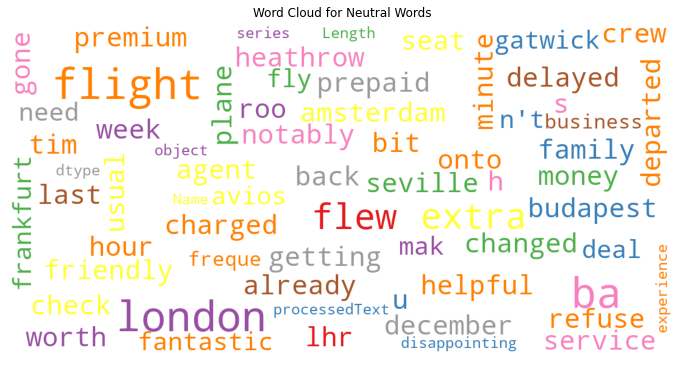

In [21]:
show_wordcloud(df[df['sentiments'] == 'Neutral']['processedText'], 'white', 'Word Cloud for Neutral Words')